In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_wine   
wine=load_wine() 



In [2]:
dataset = pd.read_csv('Wine.csv')
wine.feature_names  

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [3]:
dir(wine)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [4]:
dataset.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
dataset.tail(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [6]:
dataset.shape

(178, 14)

In [7]:
dataset['Wine'].value_counts()


2    71
1    59
3    48
Name: Wine, dtype: int64

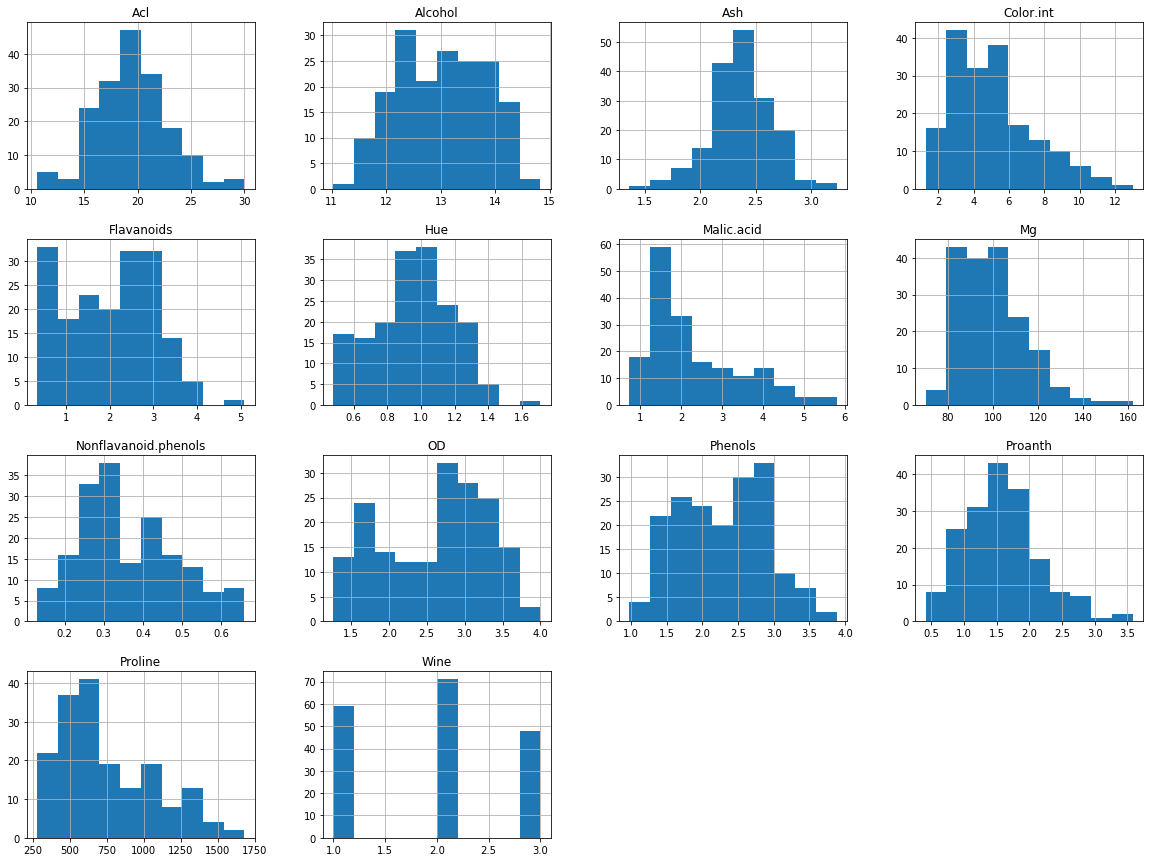

In [8]:
dataset.hist(figsize=(20, 15))
plt.show()


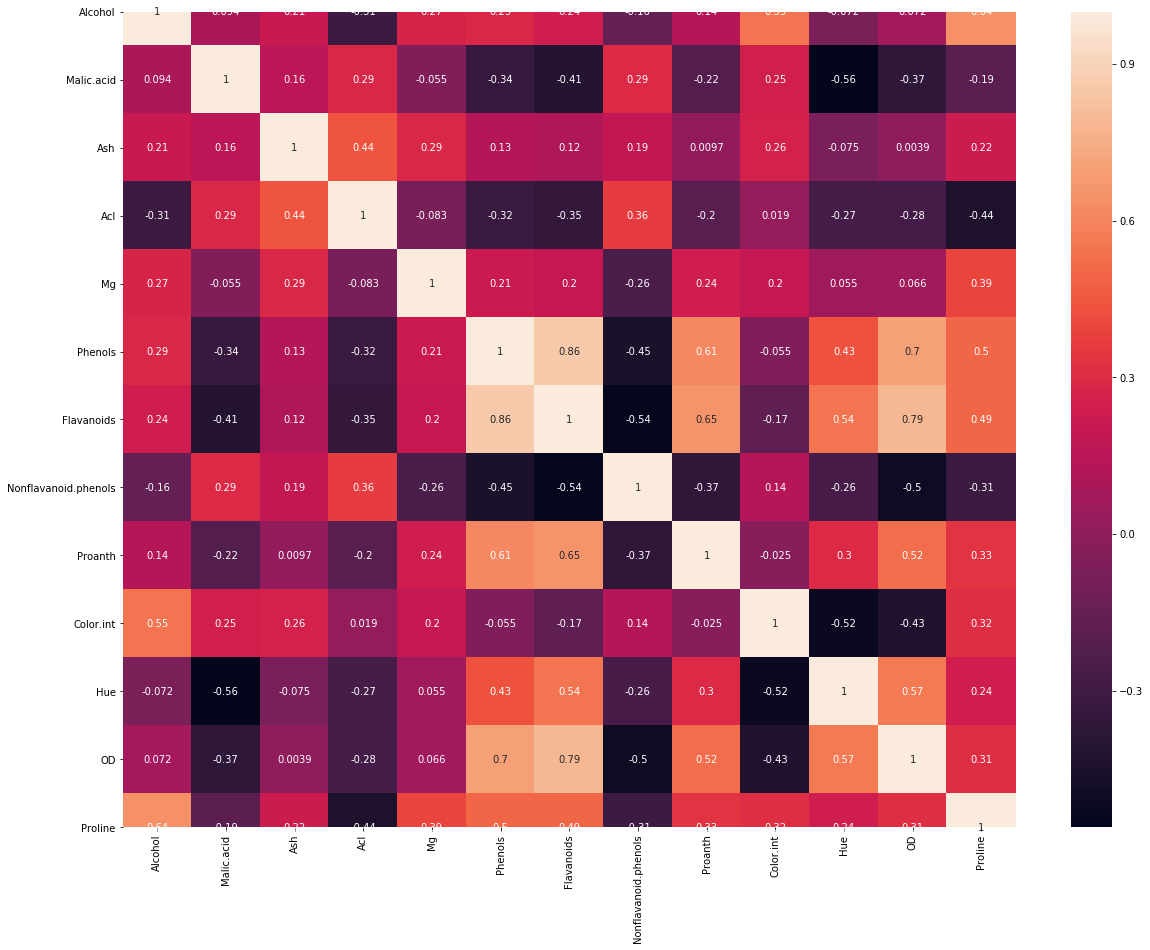

In [9]:
plt.subplots(figsize=(20, 15))
sns.heatmap(dataset.drop('Wine', axis=1).corr(), annot=True)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)



In [18]:
from sklearn.tree import DecisionTreeClassifier
print(X_train.shape)
print(X_test.shape)

(133, 13)
(45, 13)


In [19]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)

In [22]:
print(accuracy)

0.9777777777777777


In [23]:
yhat = classifier.predict(X)
dataset['yhat']=yhat
accuracy = accuracy_score(y, yhat)


In [24]:
print(accuracy)


0.9943820224719101


In [25]:
pd.DataFrame(dataset).to_csv("Wine.csv")